**Importing the libraries**

Ariful Islam<br>
Graduate Mechanical Enginner<br>
Chittagong University of Engineering & Technology<br>

**Objectives:**

- Finding out the correaltions between variables using heatmap
- Converting the categorical variables into numerical variables by label encoding and one-hot encoding

Dataset: https://github.com/SKawsar/Data_Visualization_with_Python/tree/main

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# new library in this module
from sklearn.preprocessing import LabelEncoder

**Reading the dataset**

In [21]:
df=pd.read_csv('Data_Analysis_with_Python-main/bmw.csv')
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


**We have to find correlations between variables**

**Assumptions-**

- car price increases when enginSize increases<br>
- car price increases when mpg increases<br>
- car price decreases when mileage increases<br>
- car price increases with latest year cars<br>
- when the engineSize increases, mpg decreases


In [22]:
# showing correlations between variables
# pearson correlation, by default
df_cor=df.corr()
display(df_cor)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


-1> negative correlation<br>
0> no correlation<br>
1>positive correlation

**Showing heatmap**

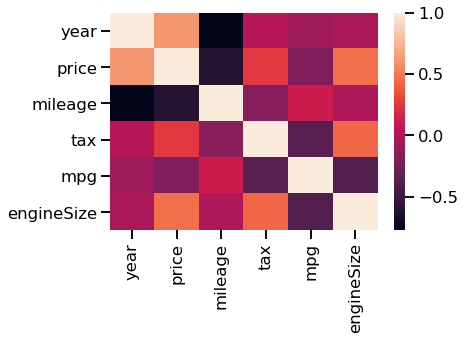

In [23]:
sns.heatmap(df_cor)
plt.show()

Light color> highest positive correlation<br>
dark color> lowest negative correlation

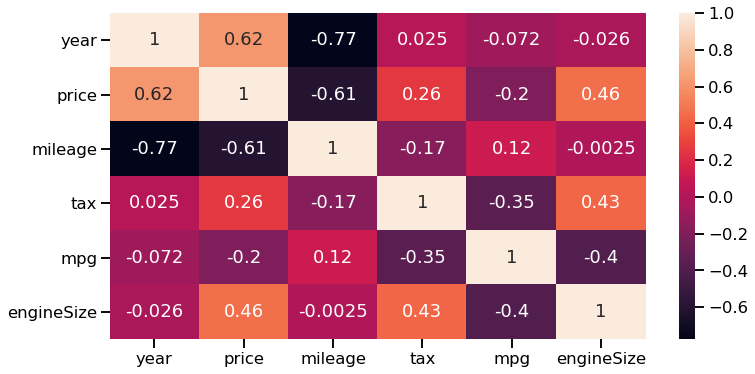

In [24]:
# to show values
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True)
plt.show()

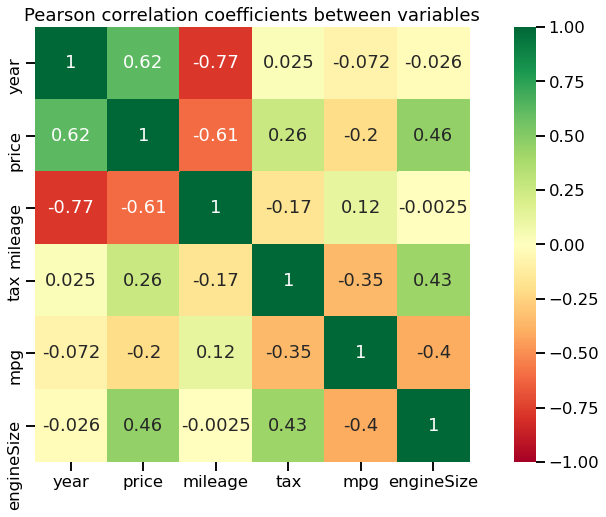

In [25]:
# to change colors
plt.figure(figsize=(16,8))
sns.heatmap(df_cor, annot=True, square=True, cmap="RdYlGn", vmax=1, vmin=-1) 
#Rd means red for -1, Yl means yellow for 0, Gn means green for 1
# square is for square boxes, vmax and vmin is for maximum and minimum range of colormap
plt.title("Pearson correlation coefficients between variables")
plt.show()

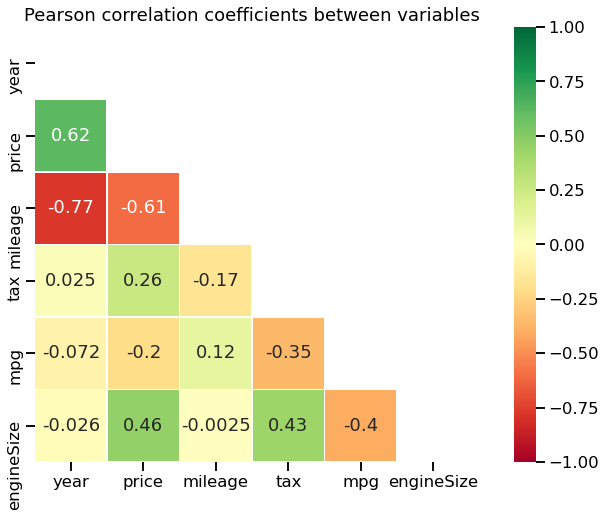

In [26]:
# removing upper triangle of diagonal as it is unnecessary
# let's first create a df that will be of the size of upper triangular portion of dataframe

m=np.zeros_like(df_cor) #making a similar dataframe with all elements equal to zero

m[np.triu_indices_from(m)]=True #taking the indices of upper triangle of df and setting their boolean value to True

plt.figure(figsize=(16,8))
sns.heatmap(df_cor, annot=True, square=True, cmap="RdYlGn", vmax=1, vmin=-1, mask=m, linewidth=0.5)
# Cells with missing values are automatically masked when mask= anything is specified
plt.title("Pearson correlation coefficients between variables")
plt.show()



**Observations**

- car price increases when enginSize increases **True**<br>
- car price increases when mpg increases **False**<br>
- car price decreases when mileage increases **True**<br>
- car price increases with latest year cars **True**<br>
- when the engineSize increases, mpg decreases **True** <br>

additional info- tax increases with engineSize



**Dealing with catagorical variable**

In [27]:
# let's see how many unique values are there
display(df["transmission"].value_counts())
display(len(df["transmission"].value_counts()))

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

3

In [28]:
display(df["fuelType"].value_counts())
display(len(df["fuelType"].value_counts()))

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

5

In [29]:
display(df["model"].unique())
display(len(df["model"].unique()))

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

24

##### Label encoder will assign a number to catagorical variables (will encode a label)
it will assign numbers to variables alphabetically

In [30]:
# let's instantiate first
LE= LabelEncoder() 
df_LE=df.copy()
df_LE["tranmissionLE"]=LE.fit_transform(df_LE["transmission"]) #fits label encoder and returns encoded label
display(df_LE.sample(10))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tranmissionLE
4227,M4,2019,41980,Semi-Auto,101,Petrol,145,34.0,3.0,2
10232,3 Series,2016,16600,Automatic,23114,Diesel,145,53.3,3.0,0
1286,4 Series,2015,13242,Manual,71179,Diesel,30,62.8,2.0,1
4937,X5,2014,23950,Automatic,67711,Diesel,200,47.1,3.0,0
3705,3 Series,2019,28980,Semi-Auto,6093,Diesel,150,48.7,2.0,2
411,2 Series,2018,19000,Semi-Auto,3764,Petrol,145,53.3,1.5,2
8344,1 Series,2016,10699,Manual,35845,Diesel,0,83.1,1.5,1
3914,4 Series,2016,17561,Semi-Auto,46435,Diesel,145,55.4,3.0,2
8202,3 Series,2015,12189,Manual,33902,Diesel,30,65.7,2.0,1
4389,X2,2019,26940,Semi-Auto,6055,Diesel,150,58.9,2.0,2


it encoded the automatic to 0, manual to 1, semi-auto to 2

In [31]:
df_LE["fuelTypeLE"]=LE.fit_transform(df_LE["fuelType"])
df_LE["modelLE"]=LE.fit_transform(df_LE["model"])
display(df_LE.sample(10))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tranmissionLE,fuelTypeLE,modelLE
4367,7 Series,2019,38980,Semi-Auto,11126,Diesel,150,58.9,3.0,2,0,6
8532,5 Series,2015,14195,Automatic,46140,Diesel,30,62.8,2.0,0,0,4
10456,4 Series,2017,18300,Automatic,23772,Petrol,145,45.6,2.0,0,4,3
1093,3 Series,2018,18995,Semi-Auto,21010,Diesel,150,62.8,2.0,2,0,2
1490,2 Series,2019,21176,Manual,123,Diesel,145,65.7,2.0,1,0,1
1009,1 Series,2015,11995,Manual,38000,Petrol,125,52.3,1.5,1,4,0
10612,5 Series,2015,13400,Manual,23932,Diesel,125,60.1,2.0,1,0,4
7154,X2,2019,29995,Semi-Auto,2315,Diesel,145,58.9,2.0,2,0,14
8266,3 Series,2019,27750,Automatic,4879,Petrol,150,41.5,2.0,0,4,2
8130,2 Series,2016,9989,Manual,43201,Diesel,20,68.9,2.0,1,0,1


**One hot encoding**

In [32]:
df_transmission=pd.get_dummies(df[['transmission']])
display(df_transmission.sample(10))

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
3616,0,1,0
9559,1,0,0
9001,0,1,0
6563,0,0,1
7861,1,0,0
6302,0,0,1
8806,1,0,0
4729,0,0,1
4129,1,0,0
247,0,1,0


here it creates dummy variables, there are number of new columns which is equal to unique value in that column<br>
if any row falls under manual transmission, the value of trans_manual column will be 1 and other two columns' values will be zero

In [33]:
# we can drop one column and still will be able to identify which kind of transmission it is
df_transmission=pd.get_dummies(df[['transmission']], drop_first=True)
display(df_transmission.sample(10))

,transmission_Manual,transmission_Semi-Auto
7599,0,0
7517,0,0
2222,0,1
9814,1,0
8149,0,0
3792,0,1
331,0,1
4416,0,1
4290,0,0
10673,0,0


it dropped the automatic transmission column<br>
if both columns- manual and semi-auto are zero then it's automatic<br>
so for n number of unique values, we can maintain n-1 number columns with one hot encoding

disadvatange of one hot encodign- feature number increases, system complexity increases, memory consumption and runtime increases

In [34]:
# let's see an example
df_example=df.copy()
print(df_example.shape)
df_OHencoding=pd.get_dummies(df, drop_first=True)
display(df_OHencoding)
print(df_OHencoding.shape)

(10781, 9)


,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10777,2016,14600,42947,125,60.1,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10778,2017,13100,25468,200,42.8,2.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
10779,2014,9930,45000,30,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10781, 35)


feature number increased from 8 to 34 (the first column is index)

**When to use label encoding and one hot encoding?**

**Label encoding-**
- when catagorical feature is ordinal (can be ranked)
- number of catagories is quite large so one hot encoding can lead to high memory consumption

**One hot encoding-**
- when catagorical feature is not ordinal (cannot be ranked)
- number of catagories is less so one hot encoding can be effectively applied 

### Now catagorical variable from mileage column

In [35]:
df['mileage'].describe()

count     10781.000000
mean      25496.986550
std       25143.192559
min           1.000000
25%        5529.000000
50%       18347.000000
75%       38206.000000
max      214000.000000
Name: mileage, dtype: float64

In [39]:
# arranging the values catagorically using pandas cut function
df_example2=df.copy()
df_example2['mileage_range']=pd.cut(df_example2['mileage'], 
                           bins=[0, 50000, 100000, 150000, 214000], 
                           labels=['excellent', 'good', 'medium', 'bad'])

display(df_example2.sample(10))
display(df_example2['mileage_range'].value_counts())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage_range
9300,5 Series,2008,5475,Automatic,65000,Diesel,160,50.4,2.0,good
1282,X1,2020,29991,Semi-Auto,2000,Diesel,145,47.9,2.0,excellent
2017,M5,2019,58991,Semi-Auto,16529,Petrol,145,26.9,4.4,excellent
592,3 Series,2013,9998,Semi-Auto,46121,Diesel,30,62.8,2.0,excellent
7179,3 Series,2020,37875,Semi-Auto,2000,Diesel,145,47.9,3.0,excellent
8537,1 Series,2015,10795,Manual,55820,Diesel,20,70.6,1.5,good
2831,3 Series,2020,23990,Manual,16,Diesel,145,56.5,2.0,excellent
2268,X1,2019,24980,Manual,3730,Petrol,145,49.6,1.5,excellent
3418,4 Series,2019,30490,Semi-Auto,4984,Diesel,150,49.6,3.0,excellent
4305,2 Series,2019,21980,Automatic,2728,Petrol,145,50.4,2.0,excellent


excellent    9083
good         1575
medium        115
bad             8
Name: mileage_range, dtype: int64

In this way we can change any numerical variable into catagorical variable

**END**